<a href="https://colab.research.google.com/github/AUIN0/AUIN0/blob/main/Masar_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
Flight Satisfaction Prediction
This project is done by Ahmed Al-Nuaim 👋
I hope you get some benefits or new ideas from this project ❤

```



# Part 1

## 1- Import libraries

In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 2- Read CSV file



```
You can acess the dataset through the following link: https://filebin.net/wc7wvk6q333031fg
```



In [7]:
# Read data file
df = pd.read_csv('/content/train.csv')
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


## 3- View the data

### Get data info

In [ ]:
# get information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

### Descriptive statistics




In [ ]:
# descriptive statistics
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## 4- Data cleaning

### Drop null values

In [ ]:
# drop rows with null values
df.dropna(inplace=True)

### Check for missing values

In [8]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

### Remove 'Unnamed: 0' column

In [ ]:
df = df.drop("Unnamed: 0", axis=1)
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


### Drop duplicates

In [ ]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


## 5- Data Processing

### Drop unnecesseary columns

In [ ]:
# drop unnecesseary columns
df.drop(['Customer Type'], axis=1, inplace=True)
df.drop(['Type of Travel'], axis=1, inplace=True)
df.drop(['Inflight wifi service'], axis=1, inplace=True)
df

,id,Gender,Age,Class,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,13,Eco Plus,460,4,3,1,5,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,25,Business,235,2,3,3,1,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,26,Business,1142,2,2,2,5,5,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,25,Business,562,5,5,5,2,2,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,61,Business,214,3,3,3,4,5,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,23,Eco,192,1,2,3,2,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,49,Business,2347,4,4,4,2,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,30,Business,1995,1,1,3,4,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,22,Eco,1000,1,1,5,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


### Change columns names

In [ ]:
# hange columns names
df.rename(columns={'Inflight entertainment': 'Flight Entertainment', 'satisfaction': 'Traverler satisfaction'}, inplace=True)
df

,id,Gender,Age,Class,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Flight Entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Traverler satisfaction
0,70172,Male,13,Eco Plus,460,4,3,1,5,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,25,Business,235,2,3,3,1,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,26,Business,1142,2,2,2,5,5,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,25,Business,562,5,5,5,2,2,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,61,Business,214,3,3,3,4,5,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,23,Eco,192,1,2,3,2,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,49,Business,2347,4,4,4,2,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,30,Business,1995,1,1,3,4,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,22,Eco,1000,1,1,5,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


## 6- Data Visualization

### countplot

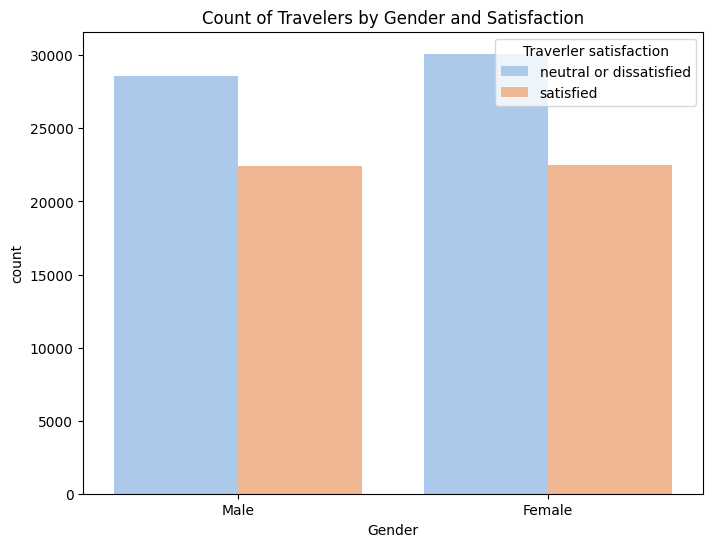

In [ ]:
# Countplot for Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, hue='Traverler satisfaction', palette='pastel')
plt.title('Count of Travelers by Gender and Satisfaction')
plt.show()

### boxplot

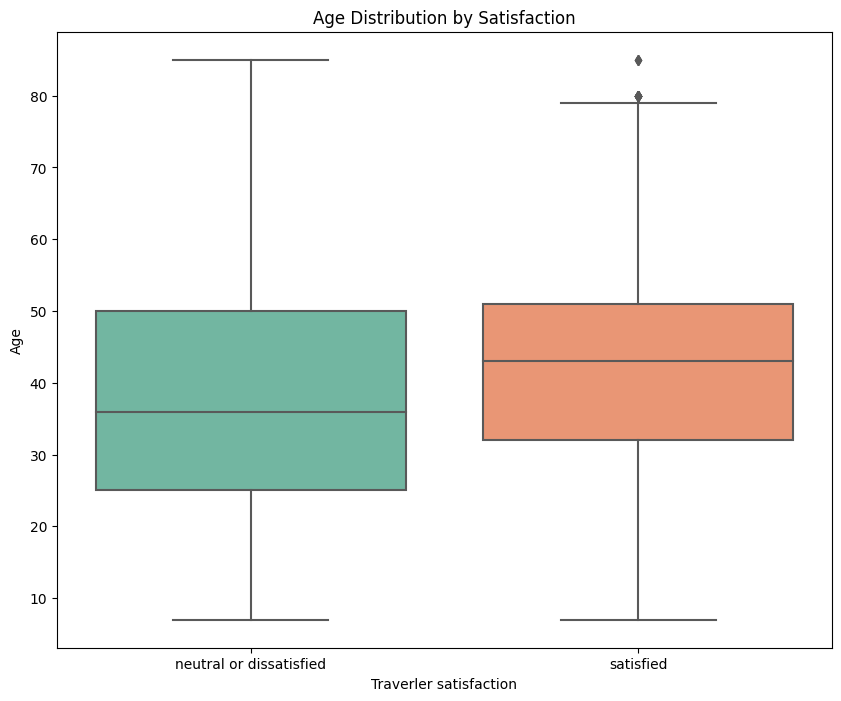

In [ ]:
# Boxplot for Age and Satisfaction
plt.figure(figsize=(10, 8))
sns.boxplot(x='Traverler satisfaction', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Satisfaction')
plt.show()

### countplot

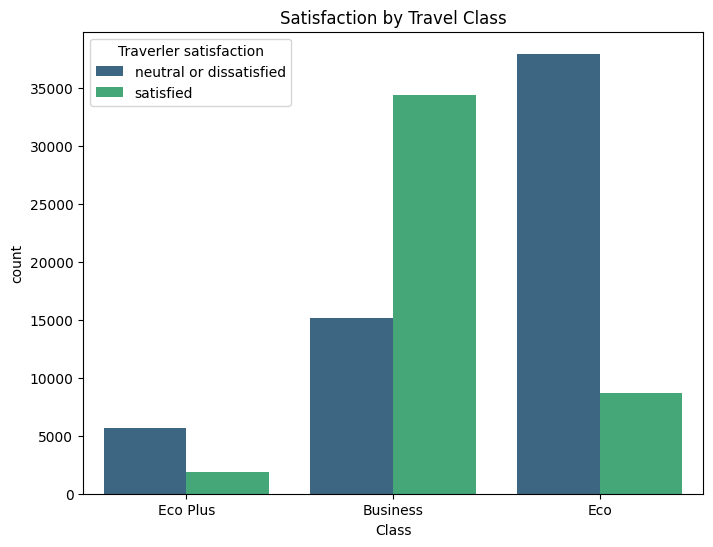

In [ ]:
# Countplot for Class and Satisfaction
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', hue='Traverler satisfaction', data=df, palette='viridis')
plt.title('Satisfaction by Travel Class')
plt.show()

### scatterplot

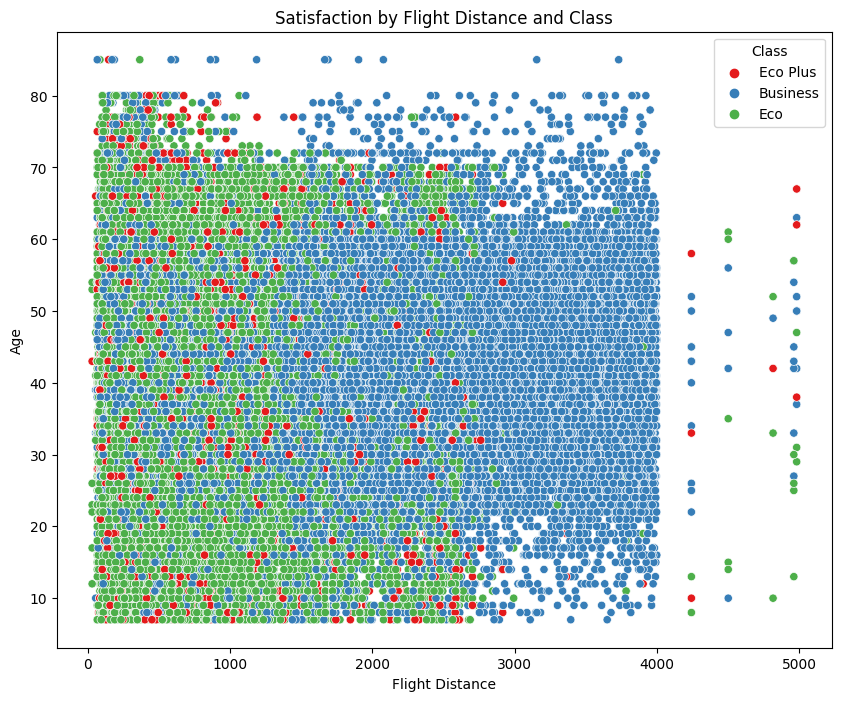

In [ ]:
# Scatterplot for Flight Distance and Age
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Flight Distance', y='Age', data=df, hue='Class', palette='Set1')
plt.title('Satisfaction by Flight Distance and Class')
plt.show()

### Correlation Matrix

<ipython-input-94-738d18e15e96>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


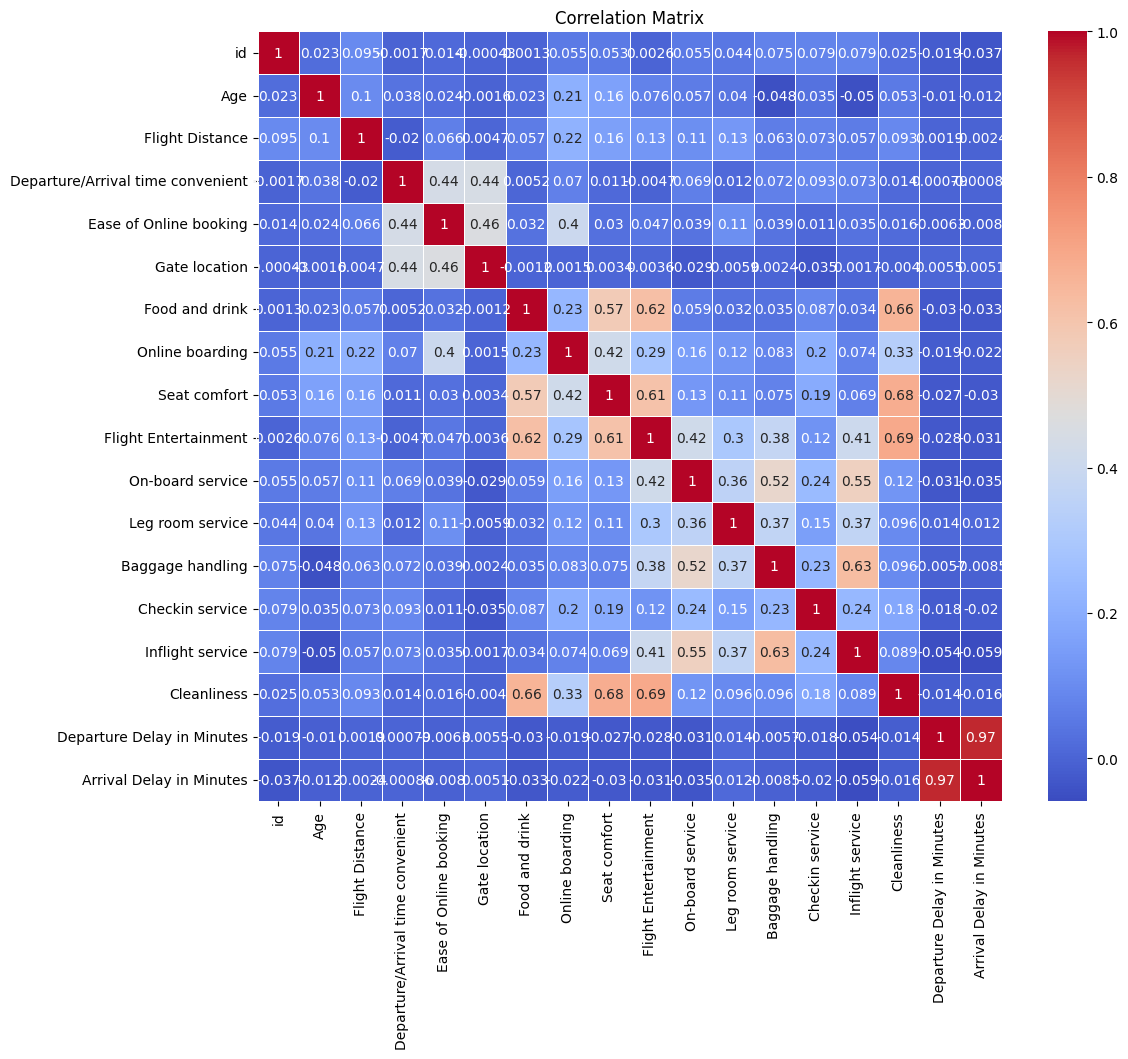

In [ ]:
# Heatmap for Correlation Matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## 7- ML algorithm

### define X and Y

In [ ]:
# X represents the features and Y represents the target
X = df[['Flight Distance', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding']]
y = df['Traverler satisfaction']


### split data for training and testing

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df.describe()

,id,Age,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Flight Entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,64942.428625,39.380466,1189.325202,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,37460.816597,15.113125,997.297235,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32562.250000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64890.000000,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97370.500000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### forest classifier

In [ ]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

### train model

In [ ]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### prediction

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

## 8- Model Evaluation

### evaluation

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8179931463873739
Confusion Matrix:
[[9776 1879]
 [1892 7172]]
Classification Report:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.84      0.84      0.84     11655
              satisfied       0.79      0.79      0.79      9064

               accuracy                           0.82     20719
              macro avg       0.82      0.82      0.82     20719
           weighted avg       0.82      0.82      0.82     20719



# Part 2

## Question 1

1. Loop:
Question:
Write a Python program that uses a 'for' loop to print all even numbers from 1 to 10. Then, use 'while' loop.

In [ ]:
#Your code goes here
print("for loop:")
for number in range(1, 11):
    if number % 2 == 0:
        print(number)

print("------------------")

print("while loop:")
number = 1
while number <= 10:
    if number % 2 == 0:
        print(number)
    number += 1

for loop:
2
4
6
8
10
------------------
while loop:
2
4
6
8
10


## Question 2

2. Control Flows:
Question:
Create a Python function named grade_classifier that takes a student's score as an argument and returns a string indicating their grade. Use the following criteria:

Score >= 90: "A"
80 <= Score < 90: "B"
70 <= Score < 80: "C"
60 <= Score < 70: "D"
Score < 60: "F"

In [2]:
#Your code goes here
def grade_classifier(mark):
    if mark >= 90:
        return "A"
    elif 80 <= mark < 90:
        return "B"
    elif 70 <= mark < 80:
        return "C"
    elif 60 <= mark < 70:
        return "D"
    else:
        return "F"

student_mark = 100
result = grade_classifier(student_mark)
print(f"The grade is: {result}")

The grade is: A


## Question 3

3. If Conditions:
Question:
Write a Python program that prompts the user to enter their age. Use if-elif-else statements to categorize and print the user's age group as follows:

If the age is less than 13, print "Child."
If the age is between 13 and 19 (inclusive), print "Teenager."
If the age is between 20 and 59 (inclusive), print "Adult."
If the age is 60 or older, print "Senior Citizen."

In [3]:
#Your code goes here
age = int(input("Enter age: "))

if age < 13:
    print("Child")
elif 13 <= age <= 19:
    print("Teenager")
elif 20 <= age <= 59:
    print("Adult")
else:
    print("Senior Citizen")

Enter age: 80
Senior Citizen


## Question 4

4. Functions:
Question:
Define a Python function named multiply_numbers that takes two parameters (num1 and num2) and returns their product. Test the function with values 5 and 7.

In [4]:
#Your code goes here
def product(num1, num2):
    return num1 * num2

result = product(5, 7)

print(f"The product of 5 and 7 is: {result}")

The product of 5 and 7 is: 35


## Question 5

5. Combine All the Above:
Question:
Write a Python program that does the following:

Prompts the user to enter a number (user_num).
Uses a loop to print all numbers from 1 to user_num (inclusive) that are divisible by 3.
Calls the grade_classifier function to classify a user's score (you can use a predefined score for testing).
Prints a message indicating whether the classified grade is satisfactory or not.

In [ ]:
#Your code goes here
def grade_classifier(score):
    if score >= 90:
        return "A"
    elif 80 <= score < 90:
        return "B"
    elif 70 <= score < 80:
        return "C"
    elif 60 <= score < 70:
        return "D"
    else:
        return "F"

user_num = int(input("Enter a number: "))

print(f"Numbers divisible by 3 from 1 to {user_num}:")
for num in range(1, user_num + 1):
    if num % 3 == 0:
        print(num)

classified_grade = grade_classifier(69)

if classified_grade in ['A', 'B', 'C']:
    print(f"The classified grade '{classified_grade}' is satisfactory.")
else:
    print(f"The classified grade '{classified_grade}' is not satisfactory.")

Enter a number: 3
Numbers divisible by 3 from 1 to 3:
3
The classified grade 'D' is not satisfactory.
